In [18]:
from Bio import Entrez
from Bio import SeqIO
from Bio import Phylo
from io import StringIO

## 1. Скачивание данных

В качестве объекта исследования были выбраны попугаи.

![](mango-parrot-58711821.png)

Отберем интересных нам попугаев. Выберем в качестве митохондриального маркера Cytb.

In [5]:
Entrez.email = "stephenpetrosian@gmail.com"
handle = Entrez.esearch(db="nucleotide", term='"Parrot"[Organism] AND Cytb[Gene]')
record_seq = Entrez.read(handle)

Получим сводную таблицу по последовательностям, содержащих выбранный нами маркер.

In [7]:
for id in record_seq['IdList']:
    handle = Entrez.esummary(db="nucleotide", id=id)
    record = Entrez.read(handle)
    print("Protein info\nUID: {}\nTitle: {}\nSequence length: {}\n".
          format(record[0]["Id"], record[0]["Title"],record[0]["Length"]))

Protein info
UID: 1635255023
Title: Coracopsis vasa voucher L609A cytochrome b (cytb) gene, partial cds; mitochondrial
Sequence length: 1012

Protein info
UID: 1635255021
Title: Coracopsis vasa voucher L608A cytochrome b (cytb) gene, partial cds; mitochondrial
Sequence length: 809

Protein info
UID: 1635254957
Title: Agapornis pullarius voucher L395 cytochrome b (cytb) gene, partial cds; mitochondrial
Sequence length: 903

Protein info
UID: 1635254955
Title: Agapornis pullarius voucher L393 cytochrome b (cytb) gene, partial cds; mitochondrial
Sequence length: 909

Protein info
UID: 1635254953
Title: Agapornis pullarius voucher L732 cytochrome b (cytb) gene, partial cds; mitochondrial
Sequence length: 988

Protein info
UID: 1635254951
Title: Agapornis pullarius voucher L725 cytochrome b (cytb) gene, partial cds; mitochondrial
Sequence length: 985

Protein info
UID: 1777393218
Title: Agapornis personatus mitochondrion, complete genome
Sequence length: 16722

Protein info
UID: 1783497457


Отберём из этого списка полные митохондриальные геномы и запишем их в FASTA файл. Получим 9 видов

Protein info
UID: 1777393218
Accession number: Agapornis personatus mitochondrion, complete genome
Sequence length: 16722

Protein info
UID: 1783497303
Accession number: Agapornis pullarius mitochondrion, complete genome
Sequence length: 16722

Protein info
UID: 1777434884
Accession number: Psittacula krameri mitochondrion, partial genome
Sequence length: 16413

Protein info
UID: 1777393403
Accession number: Psittacula roseata mitochondrion, complete genome
Sequence length: 16814

Protein info
UID: 1777393389
Accession number: Psittacula alexandri mitochondrion, complete genome
Sequence length: 16883

Protein info
UID: 1777393260
Accession number: Aratinga nenday mitochondrion, complete genome
Sequence length: 16983

Protein info
UID: 1777393232
Accession number: Agapornis lilianae mitochondrion, complete genome
Sequence length: 16720

Protein info
UID: 1777393204
Accession number: Agapornis nigrigenis mitochondrion, complete genome
Sequence length: 16718

Protein info
UID: 1770691503
Accession number: Ara macao mitochondrion, complete genome
Sequence length: 16970


In [9]:
IdList = ['1777393218', '1783497303', '1777434884', '1777393403', '1777393389', '1777393260', '1777393232',
         '1777393204', '1770691503']
for id in IdList:
    handle = Entrez.efetch(db="nucleotide", id=id, rettype="fasta", retmode="text")
    with open('parrots.fasta', 'a') as fasta_file:
        fasta_file.write(handle.read())

## 2. Получение деревьев

Произведем выравнивание, используя Muscle.

In [ ]:
!muscle -in parrots.fasta  -out parrots_aln.fasta

С помощью MegaX получим meg файл и так как программа ругается на запятые в заголовках, уберём их.

In [11]:
!sed -i -e 's/,/_/g' parrots_aln.meg

### a) Методы расстояний

Построим в MegaX дерево, используя UPGMA метод. Зададим число бутстрэп испытаний 10000.

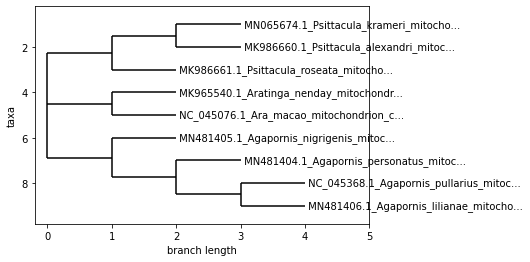

In [28]:
with open('parrots_upgma_bt.nwk') as tree:
    nwk = [line for line in tree]
    tree = Phylo.read(StringIO(*nwk), 'newick')
Phylo.draw(tree)

### б) Дискретные методы

Построим в MegaX дерево, используя ML метод. Зададим число бутстрэп испытаний 350.

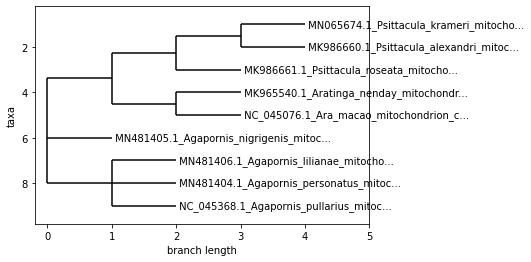

In [30]:
with open('parrots_ml_bt.nwk') as tree:
    nwk = [line for line in tree]
    tree = Phylo.read(StringIO(*nwk), 'newick')
Phylo.draw(tree)

## 3. Анализ полученной информации

![](kovalmeme.jpg)

Отметим, что представители Psittacula, Ara\Aratinga,  Agapornis живут, соответственно, в районе Индии, в районе Южной Америки и в районе Африки.  Соответственно, на дереве мы можем разделенность каждого из родов. У каждого из родов разные предки.

Можем заметить, что вопреки принадлежности Aratinga и Ara к разным родам, представители обоих родов очень близки родственно друг к другу. Кроме того, ареал их обитания совпадает.

У нас вышли две отчётливые линии для Agapornis и Psittacula.

### Agapornis

![](800px-Black-checked_Lovebird_RWD.jpg)
Agapornis nigrigenis
![](Masked_Lovebird_(Agapornis_personata)_pet_on_cage.png)
Agapornis personata
![](agapornis_pullarius.jpg)
Agapornis pullarius
![](agapornis_lilianae.jpeg)
Agapornis lilianae

Заметим, что чем ближе к Agapornis pullarius, тем короче клюв представителя вида. Кроме того, отмечается, что Agapornis nigrigenis в сравнении с Pullarius меньше по размеру (14 см против 15 см).

Кроме того, нельзя не отметить схожесть Agapornis pullarius и Agapornis lilianae. Это подтверждается их родственным положением на одной кладе.

### Psittacula

![](psitacula_roseata.jpg)
Psitacula roseata
![](Psittacula_krameri.jpg)
Psitacula krameri
![](psittacula_alexandri.jpg)
Psitacula alexandri

По ходу роста дерева наблюдался и рост попугаев. Длина тела Roseata - 30—35 см. В то время как Psittacula alexandri и Psittacula krameri - 33-35 см и 40-42 см.

### Aratinga\Ara

![](aratinga_nenday.jpg)
Aratinga nenday
![](Ara_Macao.jpg)
Ara Macao

Несмотря на расположение на одной кладе, очевидно, что на дереве имеется довольно много пропущенных между ними видов, так как внешне попугаи очень сильно различаются. Расположение на одной кладе можно попытаться объяснить разеляемым ими ареалом обитания.